<a href="https://colab.research.google.com/github/lorenagueddes/MiniProjeto02_Walmart/blob/main/MiniProjeto_DBC_Slot4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar todas as bibliotecas que podem ser usadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import scipy.stats as stats

In [ ]:
# Importar os dados
df = pd.read_csv(r'/content/Walmart.csv')

In [ ]:
# Checar os dados
df.shape
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Renomear as colunas
df.rename(columns = {
    'Store':'Loja',
    'Date':'Data',	
    'Weekly_Sales':'Vendas_na_Semana',	
    'Holiday_Flag':'Semana_com_Feriado',	
    'Temperature':'Temperatura',
    'Fuel_Price':'Preco_Combustivel',
    'Unemployment':'Desemprego'
    }, inplace = True)
df

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
# Checar os tipos dos dados
df.dtypes

Loja                    int64
Data                   object
Vendas_na_Semana      float64
Semana_com_Feriado      int64
Temperatura           float64
Preco_Combustivel     float64
CPI                   float64
Desemprego            float64
dtype: object

In [ ]:
# Converter os dados da coluna Data em Data
df ['Data'] = pd.to_datetime(df['Data'])
df

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
# Verificar se existe valor nulo
df.isna().sum()

Loja                  0
Data                  0
Vendas_na_Semana      0
Semana_com_Feriado    0
Temperatura           0
Preco_Combustivel     0
CPI                   0
Desemprego            0
dtype: int64

Converter os graus de Fahrenheit para Celsius

In [ ]:
def fahr_to_celsius(temp_fahr):
    '''Converter Fahrenheit em Celsius
    
    Retorna o valor convertido em Celsius'''
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius

In [ ]:
df ['Temperatura'] = fahr_to_celsius(df['Temperatura'])
df

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
0,1,2010-05-02,1643690.90,0,5.727778,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.616667,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.405556,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.127778,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,8.055556,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.266667,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,18.272222,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,12.483333,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,13.594444,3.969,192.330854,8.667


In [ ]:
# Checar os tipos dos dados
df.dtypes

Loja                           int64
Data                  datetime64[ns]
Vendas_na_Semana             float64
Semana_com_Feriado             int64
Temperatura                  float64
Preco_Combustivel            float64
CPI                          float64
Desemprego                   float64
dtype: object

Definir a coluna Temperatura apenas com duas casas decimais. 

In [ ]:
df = df.round({'Temperatura':2})
df

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
0,1,2010-05-02,1643690.90,0,5.73,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.62,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.41,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.13,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,8.06,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.27,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,18.27,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,12.48,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,13.59,3.969,192.330854,8.667


In [ ]:
# Media de vendas de todas as semanas
media_semana = df[['Vendas_na_Semana']]
media = np.mean(media_semana, axis=0)
media.round(2)

Vendas_na_Semana    1046964.88
dtype: float64

In [ ]:
# group by Loja - Teste
df.groupby('Loja').first()
df

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado,Temperatura,Preco_Combustivel,CPI,Desemprego
0,1,2010-05-02,1643690.90,0,5.73,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,3.62,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,4.41,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,8.13,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,8.06,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,18.27,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,18.27,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,12.48,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,13.59,3.969,192.330854,8.667


In [ ]:
# Preço medio de vendas por loja
media_vendas_por_loja = df.groupby('Loja',as_index=False)['Vendas_na_Semana'].mean()
media_vendas_por_loja = media_vendas_por_loja.round()
media_vendas_por_loja = media_vendas_por_loja.sort_values(by='Vendas_na_Semana',ascending=False)


# Renoemar coluna para ficar de acordo com agrupamento
media_vendas_por_loja.rename(columns = {
    'Vendas_na_Semana':'Total_Vendas',
    }, inplace = True)
media_vendas_por_loja

,Loja,Total_Vendas
19,20,2107677.0
3,4,2094713.0
13,14,2020978.0
12,13,2003620.0
1,2,1925751.0
9,10,1899425.0
26,27,1775216.0
5,6,1564728.0
0,1,1555264.0
38,39,1450668.0


In [ ]:
# Total de vendas por loja
total_vendas_por_loja = df.groupby('Loja',as_index=False)['Vendas_na_Semana'].sum()
total_vendas_por_loja = total_vendas_por_loja.round()
total_vendas_por_loja = total_vendas_por_loja.sort_values(by='Vendas_na_Semana',ascending=False)


# Renoemar coluna para ficar de acordo com agrupamento
total_vendas_por_loja.rename(columns = {
    'Vendas_na_Semana':'Total_Vendas',
    }, inplace = True)
total_vendas_por_loja

,Loja,Total_Vendas
19,20,301397792.0
3,4,299543953.0
13,14,288999911.0
12,13,286517704.0
1,2,275382441.0
9,10,271617714.0
26,27,253855917.0
5,6,223756131.0
0,1,222402809.0
38,39,207445542.0


In [ ]:
# 3 lojas com maior faturamento medio no período
top3mean = media_vendas_por_loja.head(3)
top3mean

,Loja,Total_Vendas
19,20,2107677.0
3,4,2094713.0
13,14,2020978.0


In [ ]:
# 3 lojas com maior faturamento total no período
top3max = total_vendas_por_loja.head(3)
top3max

,Loja,Total_Vendas
19,20,301397792.0
3,4,299543953.0
13,14,288999911.0


In [ ]:
# Loja com mais vendas - Valor correto, mas loja errada. Analisar. 
Loja_mais_vendas = total_vendas_por_loja.max()
Loja_mais_vendas


Loja                   45.0
Total_Vendas    301397792.0
dtype: float64

In [ ]:
# Loja com menos vendas - Valor correto, mas loja errada. Analisar. 
Loja_menos_vendas = total_vendas_por_loja.min()
Loja_menos_vendas

Loja                   1.0
Total_Vendas    37160222.0
dtype: float64

In [ ]:
# Criar a correção dos dados com a função corr, depois criar uma mascara para não mostrar a parte repetida da correção, com a função mask. 
correlation = df.corr()
mask = np.triu(df.corr())

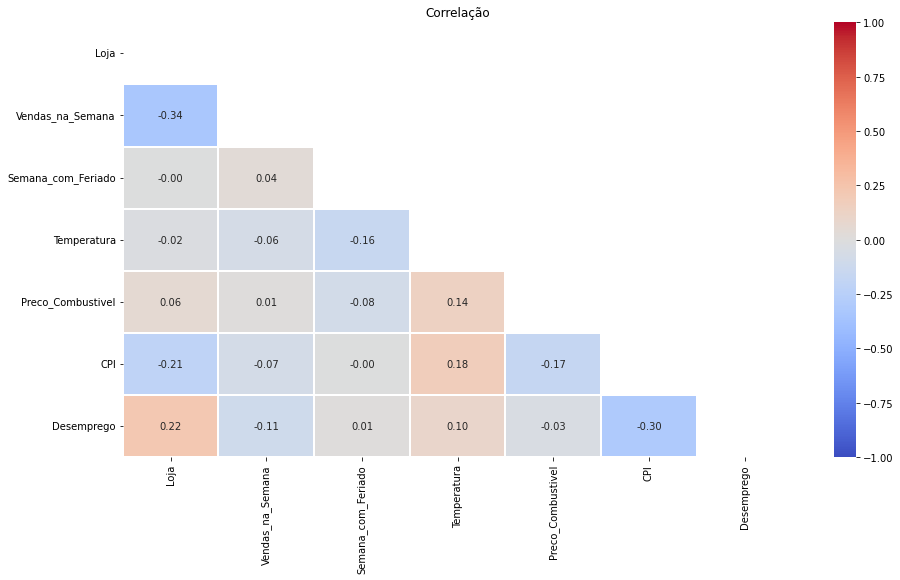

In [ ]:
# Impressão do gráfico de correlação, pela "metade" pra remover duplicidades e facilitar o entendimento. 
plt.figure(figsize = (15,8))
plt.title('Correlação')
plot = sn.heatmap(correlation, annot = True, vmin = -1, vmax = 1, cmap = 'coolwarm', fmt='.2f', linewidths=1.0, mask = mask)
plt.show()

Loja	Data	Vendas_na_Semana	Semana_com_Feriado	Temperatura	Preco_Combustivel	CPI	Desemprego

In [ ]:
# Filtragem por data com between
atendabril = atendporcliente.loc[atendporcliente['Data Solicitacao'].between('01.04.2022', '30.04.2022')]
atendabril.sort_values(by=['Data Solicitacao'],ascending=True)

In [ ]:
df1 = df[['Loja', 'Data', 'Vendas_na_Semana', 'Semana_com_Feriado']]
df1

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado
0,1,2010-05-02,1643690.90,0
1,1,2010-12-02,1641957.44,1
2,1,2010-02-19,1611968.17,0
3,1,2010-02-26,1409727.59,0
4,1,2010-05-03,1554806.68,0
...,...,...,...,...
6430,45,2012-09-28,713173.95,0
6431,45,2012-05-10,733455.07,0
6432,45,2012-12-10,734464.36,0
6433,45,2012-10-19,718125.53,0


Após descobrir que a loja 20 possui o maior número de vendas, filtramos todas as vendas apenas dessa loja e ordemos por valor de venda semanal, do maior para menor. 

In [ ]:
# Vendas por semana Loja 20
df1_mask=df1['Loja']==20
filtered_df1 = df1[df1_mask]
filtered_df1 = filtered_df1.sort_values(by='Vendas_na_Semana',ascending=False)
filtered_df1

,Loja,Data,Vendas_na_Semana,Semana_com_Feriado
2763,20,2010-12-24,3766687.43,0
2815,20,2011-12-23,3555371.03,0
2811,20,2011-11-25,2906233.25,1
2762,20,2010-12-17,2819193.17,0
2759,20,2010-11-26,2811634.04,1
...,...,...,...,...
2764,20,2010-12-31,1799737.79,1
2750,20,2010-09-24,1789687.65,0
2767,20,2011-01-21,1781805.66,0
2768,20,2011-01-28,1761506.68,0


In [ ]:
# Preço medio de vendas por loja
media_vendas = df.groupby('Data',as_index=False)['Vendas_na_Semana'].mean()
media_vendas = media_vendas.round()
media_vendas = media_vendas.sort_values(by='Vendas_na_Semana',ascending=False)

media_vendas

,Data,Vendas_na_Semana
46,2010-12-24,1798476.0
98,2011-12-23,1711072.0
95,2011-11-25,1479858.0
41,2010-11-26,1462689.0
45,2010-12-17,1373796.0
...,...,...
50,2011-01-14,903860.0
51,2011-01-21,903437.0
47,2010-12-31,898500.0
103,2012-01-27,885222.0
